In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_excel('data_h.xlsx')

X = df.values

Here we use number of data points in each cluster to select the cluster that must be decomposed.

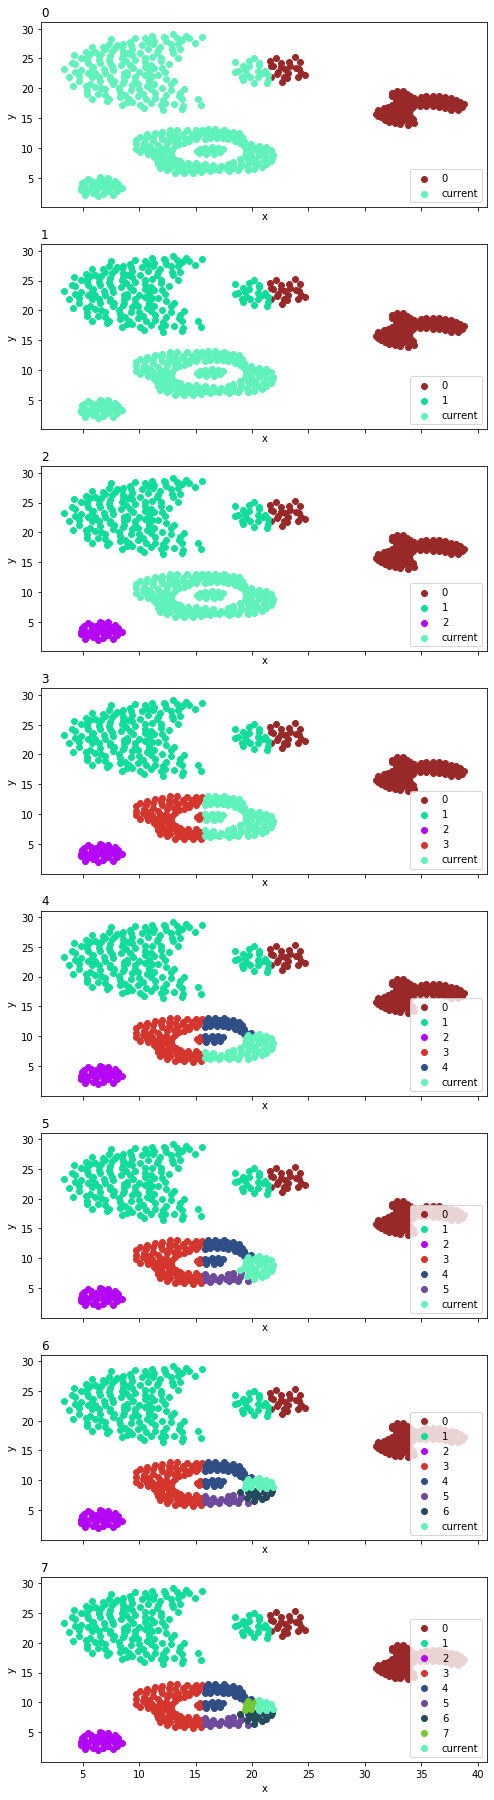

In [5]:
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=1, nrows=8, figsize=(8, 32), sharex=True, sharey=True)
rgen = np.random.RandomState(42)
colors = rgen.rand(9,3)

Xs = []
current = X

for turn in range(8):
    km = KMeans(n_clusters=2)
    km.fit(current)
    left, right = current[km.labels_ == 0], current[km.labels_ == 1]
    if left.shape[0] > right.shape[0]:
        current = left
        Xs.append(right)
    else:
        current = right
        Xs.append(left)
    for idx, data in enumerate(Xs):
        axs[turn].scatter(data[:, 0], data[:, 1], color=colors[idx + 1], label=idx)
    axs[turn].scatter(current[:, 0], current[:, 1], color=colors[0], label='current')
    axs[turn].set_title(f'{turn}', loc='left')
    axs[turn].set_xlabel('x')
    axs[turn].set_ylabel('y')
    axs[turn].legend(loc='lower right')

- Complete Link has low computation cost but it reacts to noise.
- Average Link has high computation cost but it doesn't react to noise.
- Single Link has low computation cost but it reacts to noise.

In [59]:
def complete_link(X1, X2):
    retval = 0
    for x1 in X1:
        for x2 in X2:
            v = np.linalg.norm(x1 - x2)
            retval = v if v > retval else retval
    return retval

def average_link(X1, X2):
    retval = []
    for x1 in X1:
        for x2 in X2:
            retval.append(np.linalg.norm(x1 - x2))
    return np.mean(retval)

def single_link(X1, X2):
    retval = 1000 * 1000 * 1000
    for x1 in X1:
        for x2 in X2:
            v = np.linalg.norm(x1 - x2)
            retval = v if v < retval else retval
    return retval

## Complete Link

In [47]:
clusters = [[x] for x in X.copy()]

while len(clusters) > 8:
    print(len(clusters))

    distances = np.zeros((len(clusters), len(clusters)))

    for i, c1 in enumerate(clusters):
        for j, c2 in enumerate(clusters):
            # calculate the distance between two clusters
            if i == j:
                distances[i, j] = np.inf
            else:
                distances[i, j] = complete_link(c1, c2)
    i, j = np.unravel_index(np.argmin(distances), distances.shape)
    clusters[i].extend(clusters[j])
    clusters = clusters[:j] + clusters[j + 1:]

515
514
513
512
511
510
509
508
507
506
505
504
503
502
501
500
499
498
497
496
495
494
493
492
491
490
489
488
487
486
485
484
483
482
481
480
479
478
477
476
475
474
473
472
471
470
469
468
467
466
465
464
463
462
461
460
459
458
457
456
455
454
453
452
451
450
449
448
447
446
445
444
443
442
441
440
439
438
437
436
435
434
433
432
431
430
429
428
427
426
425
424
423
422
421
420
419
418
417
416
415
414
413
412
411
410
409
408
407
406
405
404
403
402
401
400
399
398
397
396
395
394
393
392
391
390
389
388
387
386
385
384
383
382
381
380
379
378
377
376
375
374
373
372
371
370
369
368
367
366
365
364
363
362
361
360
359
358
357
356
355
354
353
352
351
350
349
348
347
346
345
344
343
342
341
340
339
338
337
336
335
334
333
332
331
330
329
328
327
326
325
324
323
322
321
320
319
318
317
316
315
314
313
312
311
310
309
308
307
306
305
304
303
302
301
300
299
298
297
296
295
294
293
292
291
290
289
288
287
286
285
284
283
282
281
280
279
278
277
276
275
274
273
272
271
270
269
268
267
266


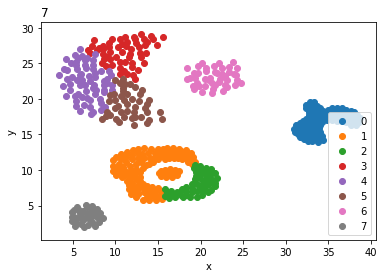

In [56]:
fig, ax = plt.subplots()

for idx, x in enumerate(clusters):
    data = np.array(x)
    ax.scatter(data[:, 0], data[:, 1], label=idx)
ax.set_title(f'{turn}', loc='left')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend(loc='lower right')

## Average Link

In [60]:
clusters = [[x] for x in X.copy()]

while len(clusters) > 8:
    print(len(clusters))

    distances = np.zeros((len(clusters), len(clusters)))

    for i, c1 in enumerate(clusters):
        for j, c2 in enumerate(clusters):
            # calculate the distance between two clusters
            if i == j:
                distances[i, j] = np.inf
            else:
                distances[i, j] = average_link(c1, c2)
    i, j = np.unravel_index(np.argmin(distances), distances.shape)
    clusters[i].extend(clusters[j])
    clusters = clusters[:j] + clusters[j + 1:]

515
514
513
512
511
510
509
508
507
506
505
504
503
502
501
500
499
498
497
496
495
494
493
492
491
490
489
488
487
486
485
484
483
482
481
480
479
478
477
476
475
474
473
472
471
470
469
468
467
466
465
464
463
462
461
460
459
458
457
456
455
454
453
452
451
450
449
448
447
446
445
444
443
442
441
440
439
438
437
436
435
434
433
432
431
430
429
428
427
426
425
424
423
422
421
420
419
418
417
416
415
414
413
412
411
410
409
408
407
406
405
404
403
402
401
400
399
398
397
396
395
394
393
392
391
390
389
388
387
386
385
384
383
382
381
380
379
378
377
376
375
374
373
372
371
370
369
368
367
366
365
364
363
362
361
360
359
358
357
356
355
354
353
352
351
350
349
348
347
346
345
344
343
342
341
340
339
338
337
336
335
334
333
332
331
330
329
328
327
326
325
324
323
322
321
320
319
318
317
316
315
314
313
312
311
310
309
308
307
306
305
304
303
302
301
300
299
298
297
296
295
294
293
292
291
290
289
288
287
286
285
284
283
282
281
280
279
278
277
276
275
274
273
272
271
270
269
268
267
266


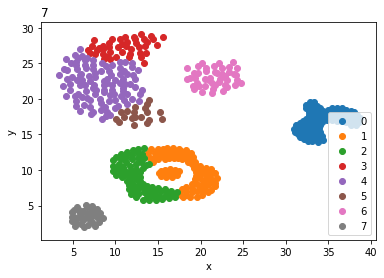

In [61]:
fig, ax = plt.subplots()

for idx, x in enumerate(clusters):
    data = np.array(x)
    ax.scatter(data[:, 0], data[:, 1], label=idx)
ax.set_title(f'{turn}', loc='left')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend(loc='lower right')

## Single Link

In [63]:
clusters = [[x] for x in X.copy()]

while len(clusters) > 8:
    print(len(clusters))

    distances = np.zeros((len(clusters), len(clusters)))

    for i, c1 in enumerate(clusters):
        for j, c2 in enumerate(clusters):
            # calculate the distance between two clusters
            if i == j:
                distances[i, j] = np.inf
            else:
                distances[i, j] = single_link(c1, c2)
    i, j = np.unravel_index(np.argmin(distances), distances.shape)
    clusters[i].extend(clusters[j])
    clusters = clusters[:j] + clusters[j + 1:]

515
514
513
512
511
510
509
508
507
506
505
504
503
502
501
500
499
498
497
496
495
494
493
492
491
490
489
488
487
486
485
484
483
482
481
480
479
478
477
476
475
474
473
472
471
470
469
468
467
466
465
464
463
462
461
460
459
458
457
456
455
454
453
452
451
450
449
448
447
446
445
444
443
442
441
440
439
438
437
436
435
434
433
432
431
430
429
428
427
426
425
424
423
422
421
420
419
418
417
416
415
414
413
412
411
410
409
408
407
406
405
404
403
402
401
400
399
398
397
396
395
394
393
392
391
390
389
388
387
386
385
384
383
382
381
380
379
378
377
376
375
374
373
372
371
370
369
368
367
366
365
364
363
362
361
360
359
358
357
356
355
354
353
352
351
350
349
348
347
346
345
344
343
342
341
340
339
338
337
336
335
334
333
332
331
330
329
328
327
326
325
324
323
322
321
320
319
318
317
316
315
314
313
312
311
310
309
308
307
306
305
304
303
302
301
300
299
298
297
296
295
294
293
292
291
290
289
288
287
286
285
284
283
282
281
280
279
278
277
276
275
274
273
272
271
270
269
268
267
266


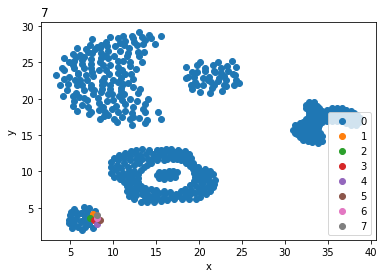

In [64]:
fig, ax = plt.subplots()

for idx, x in enumerate(clusters):
    data = np.array(x)
    ax.scatter(data[:, 0], data[:, 1], label=idx)
ax.set_title(f'{turn}', loc='left')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend(loc='lower right')